In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [2]:
# set the environment variable for visualizing the graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [48]:
# Import the bank dataset and print the top 10 rows
bank = pd.read_csv( 'bank-full.csv', sep = ';')

bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# Exploratory Data Analysis

In [5]:
# fetch the 5 number summary to analyze the distribution and outliers in the data
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


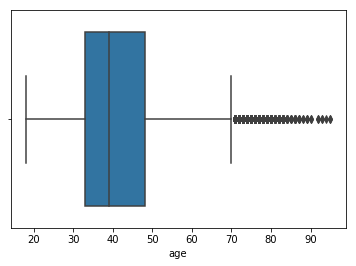

In [6]:
# ploting the boxplots for the columns age, balance, day, duration, campaign, pdays and previous to see whether ther are outliers
sns.boxplot(bank['age'])

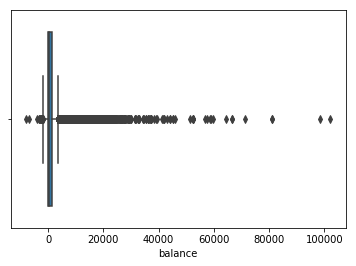

In [7]:
sns.boxplot(bank['balance'])

lot of outliers in the balance attribute

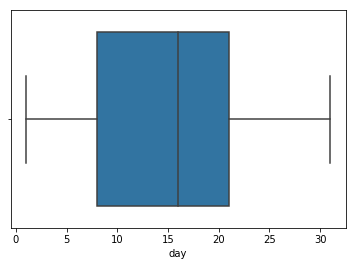

In [8]:
sns.boxplot(bank['day'])

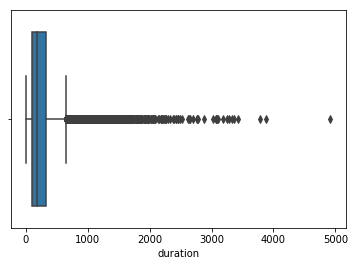

In [9]:
sns.boxplot(bank['duration'])

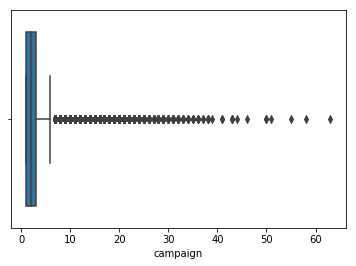

In [10]:
sns.boxplot(bank['campaign'])

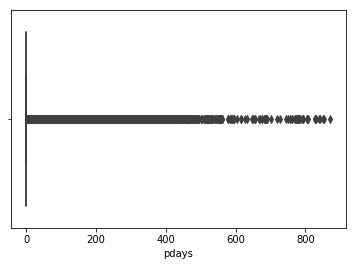

In [11]:
sns.boxplot(bank['pdays'])

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


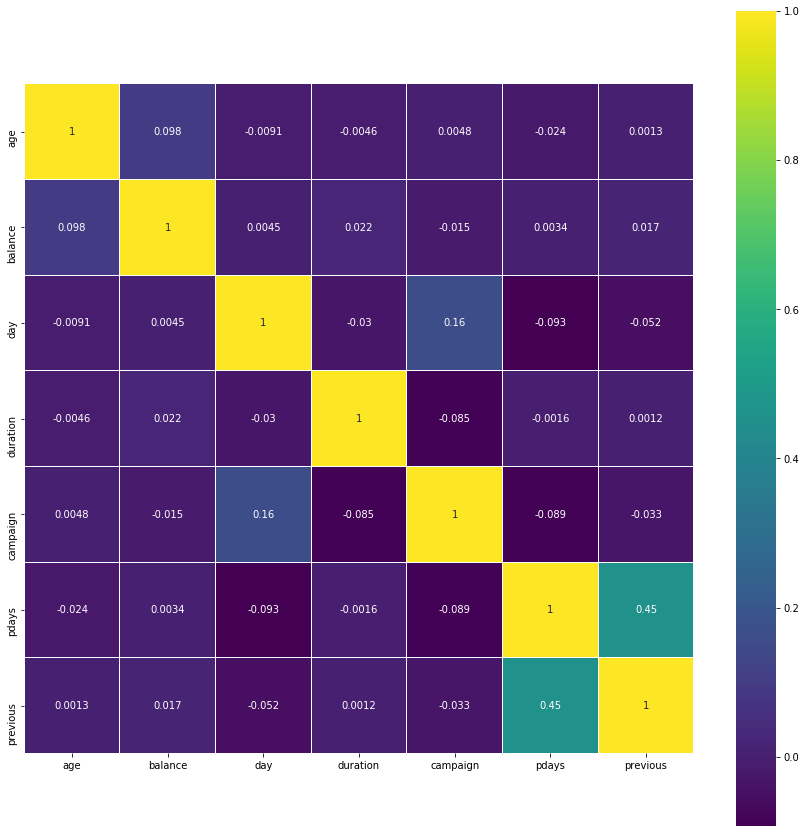

In [12]:
# now we analyze the correlation between the all the attributes in the dataset.
correlation_matrix = bank.corr()
print(correlation_matrix)
# plotting the correlation matrix to analyze the relation between the attributes
colormap = plt.cm.viridis   
plt.figure(figsize = (15,15))
sns.heatmap(bank.corr(), linewidths= 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = 'white', annot = True)

we can remove the attributes which are least correlated but we leave it to the Decision tree to remove these attributes because the decision tree itself will take care of it using max_feature property while fitting the data set

C:\Users\Niket\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


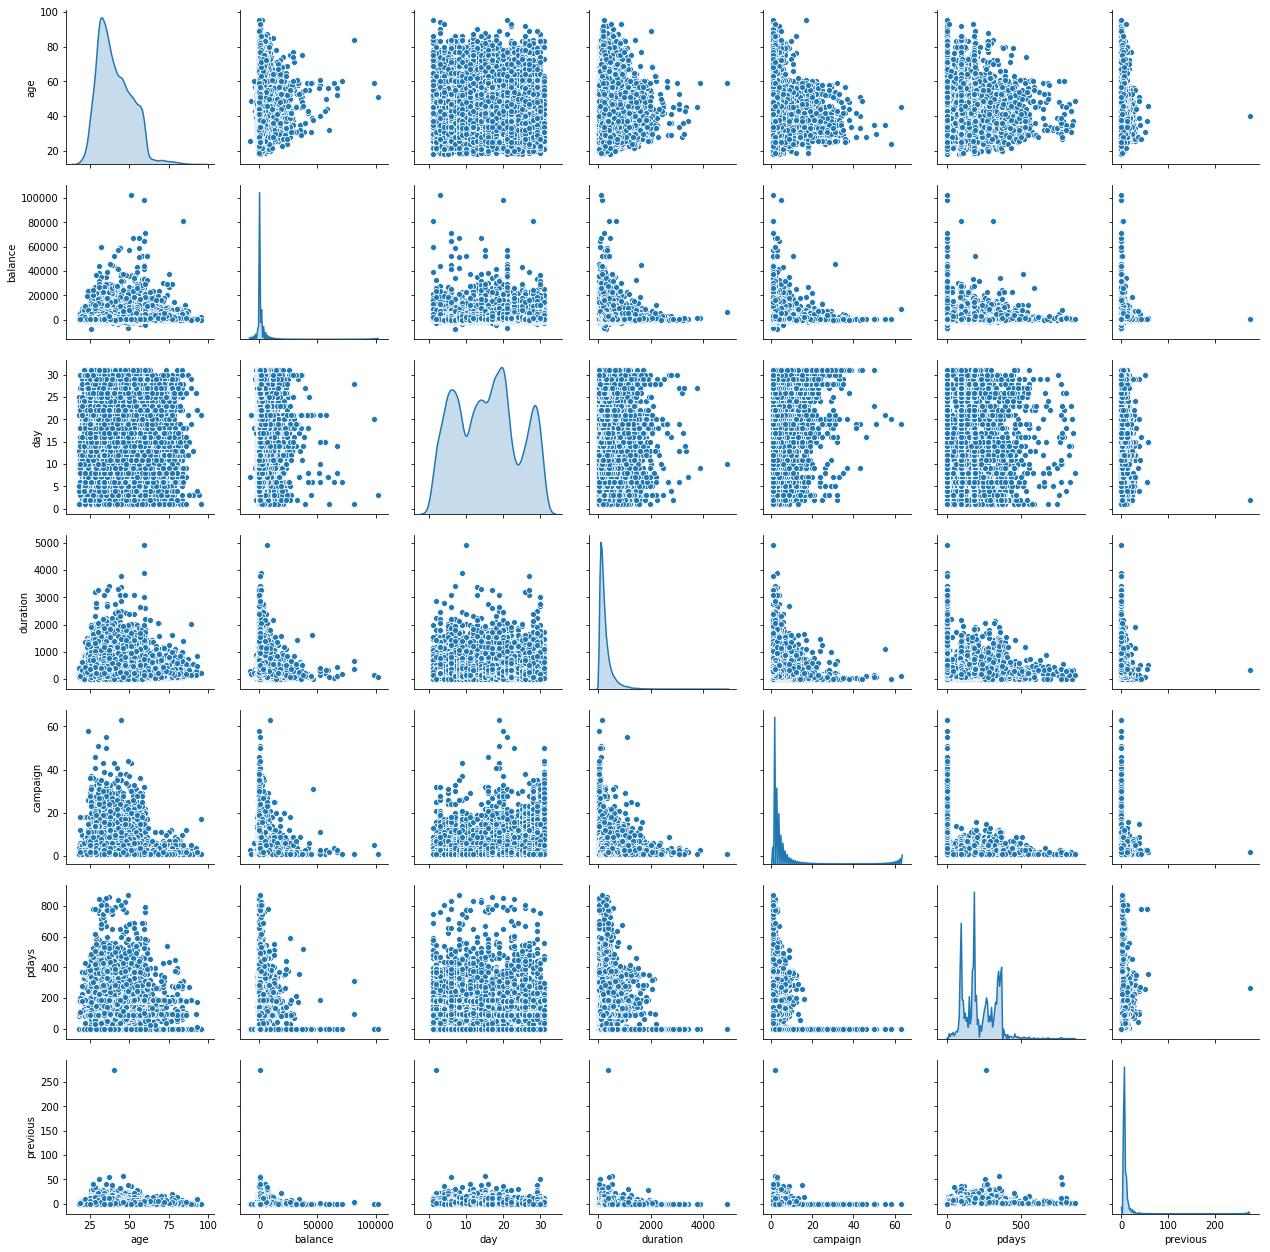

In [14]:
# ploting the distribution for the each attribute using pairplot.
sns.pairplot(bank, diag_kind = 'kde')

look at how the balance and day attributes are least correlated and they not normally distributed too.
same for pdays and day, and day and age so day attribute is not so useful in predicting the data so we can remove this attribute

# Prepare the data for analytics

In [50]:
# since, the balance, campaign, pdays and duration has lot of outliers 
# we remove the outliers from the dataset
from scipy import stats

z = np.abs(stats.zscore(bank[['age', 'balance', 'day', 'duration', 'campaign', 'previous','pdays']]))
print(z)

Q1 = bank.quantile(0.25)
Q3 = bank.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

#print((bank < (Q1 - 1.5 * IQR)) | (bank > (Q3 + 1.5 * IQR)))

bank_refined = bank[(z < 3).all(axis = 1)]

[[1.60696496 0.25641925 1.29847633 ... 0.56935064 0.25194037 0.41145311]
 [0.28852927 0.43789469 1.29847633 ... 0.56935064 0.25194037 0.41145311]
 [0.74738448 0.44676247 1.29847633 ... 0.56935064 0.25194037 0.41145311]
 ...
 [2.92540065 1.42959305 0.14341818 ... 0.72181052 1.05047333 1.43618859]
 [1.51279098 0.22802402 0.14341818 ... 0.39902023 0.25194037 0.41145311]
 [0.37068857 0.52836436 0.14341818 ... 0.24656035 4.52357654 1.4761376 ]]
age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [16]:
# we see how many rows we have deleted from the dataset whech were outliers
print(bank.shape)
print(bank_refined.shape)

(45211, 17)
(40209, 17)


we almost deleted more than 5000 data rows from the dataset which may effect in predicting.

In [19]:
bank_refined.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [51]:
# now as as we can see there are many columns which are categorical for example job, marital, education etc., 
# so we convert these into categorical data and remove the first column from converted attribute of each categorical attribute.
bank_refined['job'].unique()
bank_refined['job'] = bank_refined['job'].replace({'unemployed' : 1, 'services' : 2, 'management': 3, 'blue-collar' : 4,
       'self-employed': 5, 'technician': 6, 'entrepreneur': 7, 'admin.': 8, 'student': 9,
       'housemaid': 10, 'retired': 11, 'unknown': 0})
bank_refined['month'] = bank_refined['month'].replace({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5,
                        'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
bank_refined['y'] = bank_refined['y'].replace({'yes': 1, 'no': 0})

bank_categorical = pd.get_dummies(bank_refined, columns = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y'], drop_first = True)

bank_categorical.info()

C:\Users\Niket\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Niket\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40209 entries, 0 to 45209
Data columns (total 23 columns):
age                    40209 non-null int64
job                    40209 non-null int64
balance                40209 non-null int64
day                    40209 non-null int64
month                  40209 non-null int64
duration               40209 non-null int64
campaign               40209 non-null int64
pdays                  40209 non-null int64
previous               40209 non-null int64
marital_married        40209 non-null uint8
marital_single         40209 non-null uint8
education_secondary    40209 non-null uint8
education_tertiary     40209 non-null uint8
education_unknown      40209 non-null uint8
default_yes            40209 non-null uint8
housing_yes            40209 non-null uint8
loan_yes               40209 non-null uint8
contact_telephone      40209 non-null uint8
contact_unknown        40209 non-null uint8
poutcome_other         40209 non-null uint8
poutcome_su

C:\Users\Niket\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
bank_categorical.rename(columns = {'y_1': 'y'}, inplace = True)

In [65]:
# define X by taking all the independent attrubutes to X and y dependent variable.
X = bank_categorical.drop('y', axis = 1)
y = bank_categorical.y

0    36155
1     4054
Name: y, dtype: int64

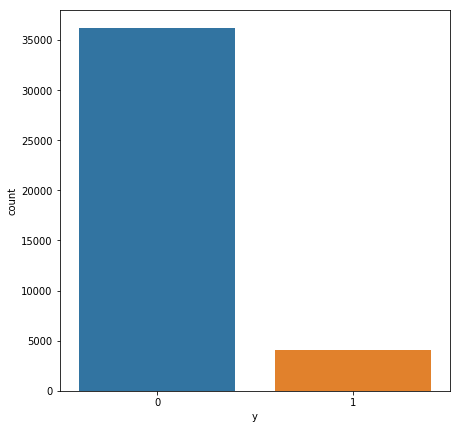

In [110]:
# check the distribution of y variable.
plt.figure(figsize = (7, 7))
ax = sns.countplot(y)
y.value_counts()

In [ ]:
# remove the days and pdays attributes because they are least correlated
X = X.drop(["days", "pdays"])

In [132]:
# split the data for training and testing by 70:30 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [133]:
# scaling the data because the some attribute scale are very large.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# create the ensemble model and Tune the model

In [ ]:
# fit the first ensemble model DicisionTree
from sklearn.tree import DecisionTreeClassifier
bank_classifier = DecisionTreeClassifier(max_features = 16, min_samples_split = 3,
                                         min_impurity_split = 0.12, criterion= 'gini',
                                         max_depth = 5)
bank_classifier.fit(X_train_scaled, y_train)

# print the scores for both train and test
print(bank_classifier.score(X_train_scaled,y_train))
print(bank_classifier.score(X_test_scaled, y_test))

 Decision tree classifier perfomrd good in training data set with 91% accuracy whereas in test dataset it achived 91%
 this result achieved by tuning parmeters

# We try with different ensemble techniques to tune and improve the accuracy

In [136]:
# bagging method(bootstrap aggregation) for this model building we use our bank_classifier as base estimator 
# and print the accuracy
from sklearn.ensemble import BaggingClassifier
bag_classifier = BaggingClassifier(base_estimator = bank_classifier, n_estimators = 50, max_features = 16, random_state = 10)
bag_classifier.fit(X_train_scaled, y_train)
print(bag_classifier.score(X_train_scaled, y_train))
print(bag_classifier.score(X_test_scaled, y_test))

C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The m

C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The m

0.9127762381865985
0.9106358285666916


In [170]:
# ada boosting 
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier(base_estimator= bank_classifier, n_estimators= 100, random_state = 10)
ada_classifier.fit(X_train, y_train)
print(ada_classifier.score(X_train_scaled, y_train))
print(ada_classifier.score(X_test_scaled, y_test))

C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The m

C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The m

C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The m

C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The m

0.8999502593618987
0.8973721296526569


In [171]:
ada_classifier.feature_importances_

array([0.12551183, 0.06115515, 0.23464828, 0.09907422, 0.27201037,
       0.04595883, 0.02336808, 0.01341838, 0.00884755, 0.01256931,
       0.01282998, 0.00684941, 0.00166716, 0.01882308, 0.01113738,
       0.0085356 , 0.01228107, 0.00855285, 0.01521343, 0.00754802])

In [168]:
# gradient ada boostring
from sklearn.ensemble import GradientBoostingClassifier
grad_classifier = GradientBoostingClassifier(loss = 'deviance', n_estimators = 100, max_features = 5, max_depth = 5)
grad_classifier.fit(X_train_scaled, y_train)
print(grad_classifier.score(X_train_scaled, y_train))
print(grad_classifier.score(X_test_scaled, y_test))

0.9308249840119378
0.9135372627041366


In [169]:
# let see the feature importances and tune the model accordingly
grad_classifier.feature_importances_

array([0.07801352, 0.01471587, 0.04132244, 0.12821323, 0.38652327,
       0.01460867, 0.03091575, 0.00707699, 0.00580417, 0.00181152,
       0.00939199, 0.00174933, 0.00204117, 0.051186  , 0.00738438,
       0.00396815, 0.03873815, 0.00173202, 0.12897784, 0.04582552])

In [153]:
# random forest
from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier(n_estimators='warn', criterion = 'gini', max_depth = 5, 
                                           max_features=8)
random_classifier.fit(X_train_scaled, y_train)
print(random_classifier.score(X_train_scaled, y_train))
print(random_classifier.score(X_test_scaled, y_test))

C:\Users\Niket\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9118169544517871
0.910801624803117


** We tried with all ensemble model and tune the model with different parameters but still achieved 91% accuracy
There is no much difference in the accuracy of each model but we still choose best among them.
We can choose gradient boost with n_estimators = 100, max_depth = 5 and max_features = 8 gave us 91.3% accuracy with test data
And with 93% accuracy on training data.
So we conclude that without overfitting we achieved the best result with test set.

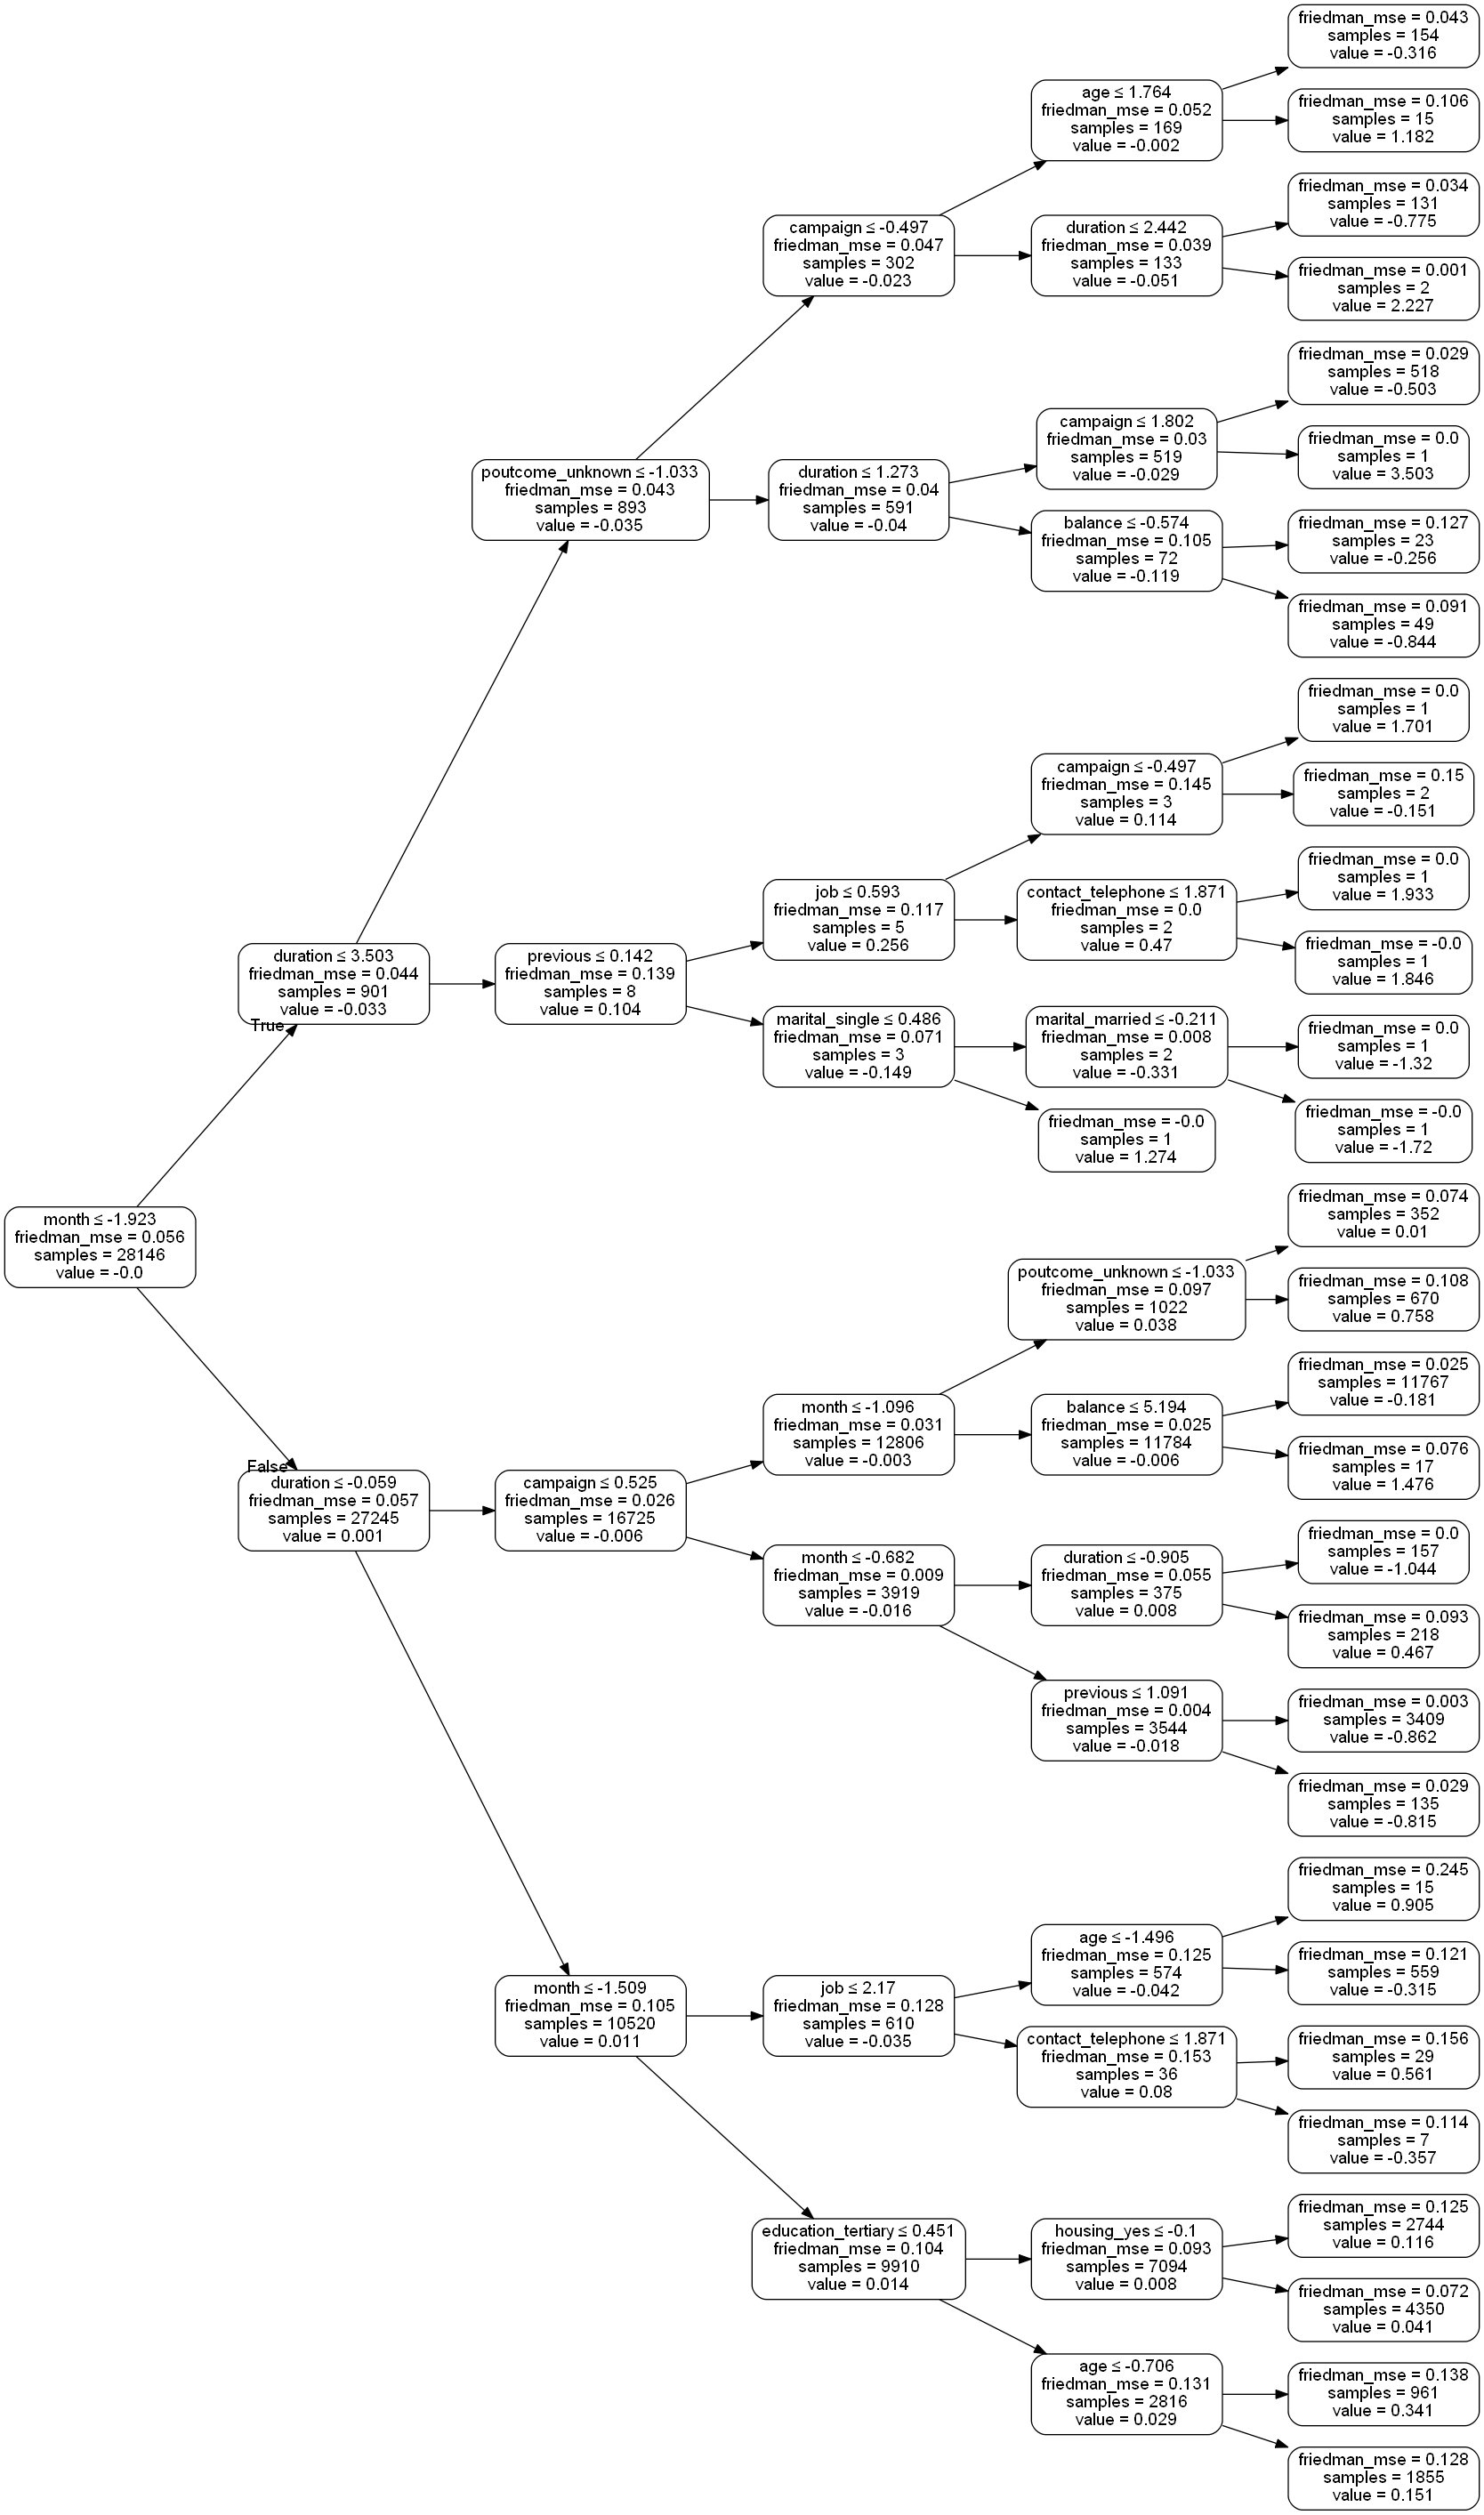

In [187]:
# Finally we plot the gredient boosting tree to see the split of the data in the tree.
import graphviz
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image 
import pydotplus

dot_data = tree.export_graphviz(grad_classifier.estimators_[41, 0], out_file = None,
                                feature_names = list(X_train),
                                class_names = ["No", "Yes"],
                                rounded = True,
                                rotate = True,
                                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())
